In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.data_utils import transform_for_classification
from scripts.constants import TEST_DATASETS_FOR_DATASET, TARGET_COLUMNS_FOR_DATASET
from scripts.base_lr import run_logistic_regression_on_2d

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [4]:
discretization_lr_results = pd.read_csv(os.path.join(RESULTS_FOLDER, "discretization_logistic_regression_results.csv"))

In [5]:
dataset_name = "adult_no_discretization"

train_df_path = os.path.join(CURRENT_FOLDER, "data/datasets/adult_no_discretization.csv")
train_df = pd.read_csv(train_df_path)

test_df_path = TEST_DATASETS_FOR_DATASET[dataset_name]
test_df = pd.read_csv(os.path.join(CURRENT_FOLDER, test_df_path))

In [6]:
train_df_transformed = transform_for_classification(dataset_name, train_df)

df_np = train_df_transformed.to_numpy()

target_column: str = TARGET_COLUMNS_FOR_DATASET[dataset_name]
feature_columns = [col for col in train_df_transformed.columns if col != target_column]

X_train, y_train = train_df_transformed.drop(columns=[target_column]), train_df_transformed[target_column]

test_df_transformed = transform_for_classification(dataset_name, test_df)

# Check that both have equal columns
assert set(list(train_df_transformed.columns.values)).symmetric_difference(
    set(list(test_df_transformed.columns.values))) == set()

target_column_index = train_df_transformed.columns.get_loc(target_column)

X_test, y_test = test_df_transformed.drop(columns=[target_column]), test_df_transformed[target_column]

accuracy_score, balanced_accuracy_score, f1_score, \
coefficients, point_estimates, variance_estimates, confidence_intervals = \
    run_logistic_regression_on_2d(df_np,
                                  X_train,
                                  y_train,
                                  X_test,
                                  y_test,
                                  return_confidence_intervals=True,
                                  col_to_predict=target_column_index)

In [7]:
print(accuracy_score)
print(balanced_accuracy_score)
print(f1_score)

0.8396414342629482
0.7472744575561476
0.6341463414634146


In [8]:
discretization_lr_results.loc[len(discretization_lr_results.index)] = [
    None, dataset_name, np.nan, [], "∞", "NUTS", accuracy_score, balanced_accuracy_score, f1_score, None, None, None
] 

In [9]:
discretization_lr_results_combined = discretization_lr_results[discretization_lr_results['dataset_index'].isna()]

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


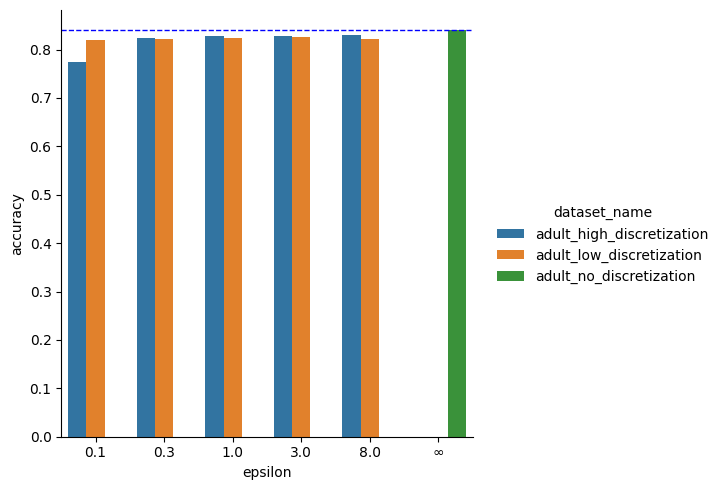

In [10]:
g = sns.catplot(data=discretization_lr_results_combined, kind="bar", x="epsilon", hue="dataset_name", y="accuracy")
g.refline(y = accuracy_score, color = "blue", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_combined_accuracy.pdf"))

In [11]:
discretization_lr_results_single = discretization_lr_results[(discretization_lr_results['dataset_index'].isna() == False) | (discretization_lr_results['dataset_name'] == "adult_no_discretization")]

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


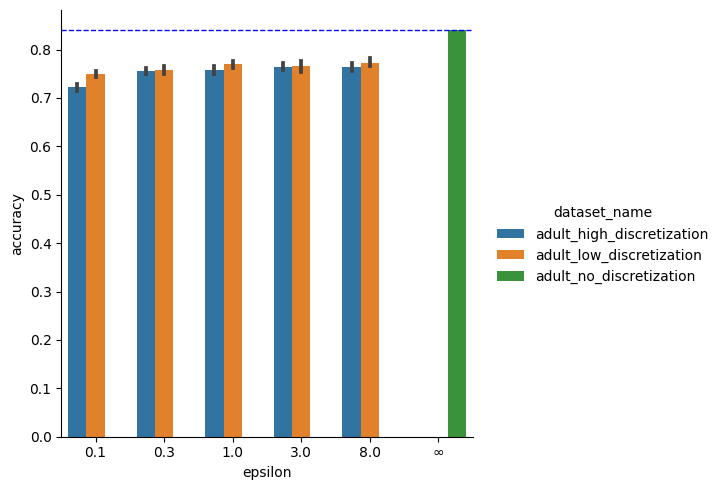

In [12]:
g = sns.catplot(data=discretization_lr_results_single, kind="bar", x="epsilon", hue="dataset_name", y="accuracy")
g.refline(y = accuracy_score, color = "blue", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_single_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


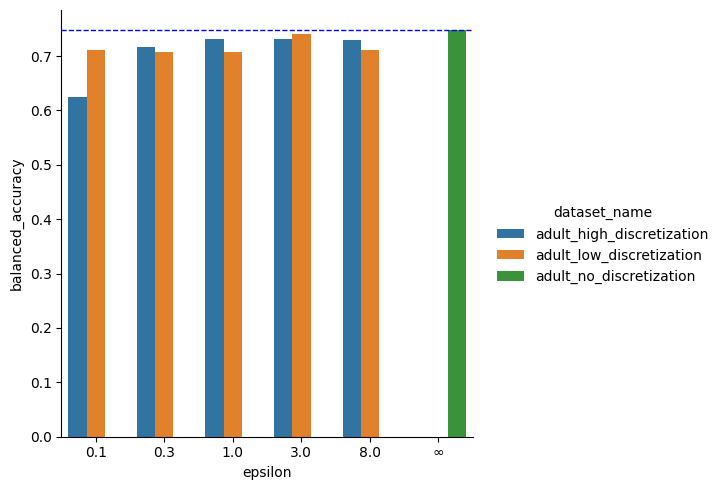

In [13]:
g = sns.catplot(data=discretization_lr_results_combined, kind="bar", x="epsilon", hue="dataset_name", y="balanced_accuracy")
g.refline(y = balanced_accuracy_score, color = "blue", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_combined_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


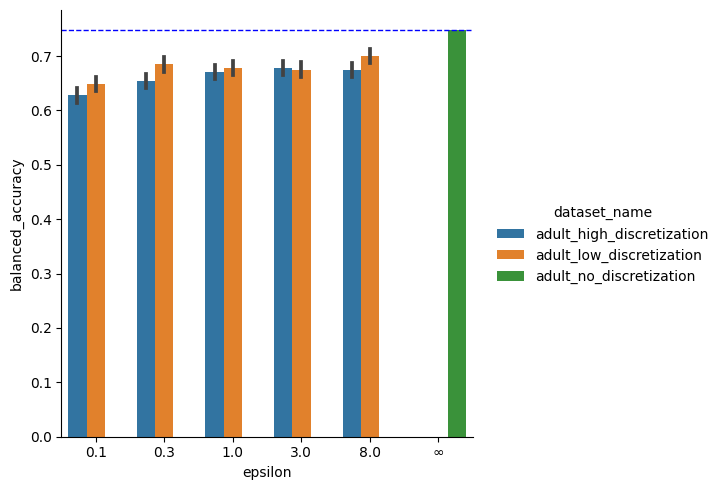

In [14]:
g = sns.catplot(data=discretization_lr_results_single, kind="bar", x="epsilon", hue="dataset_name", y="balanced_accuracy")
g.refline(y = balanced_accuracy_score, color = "blue", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_single_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


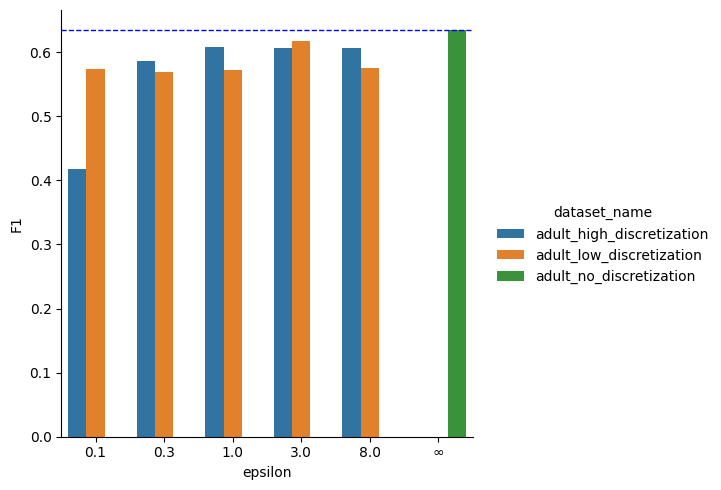

In [15]:
g = sns.catplot(data=discretization_lr_results_combined, kind="bar", x="epsilon", hue="dataset_name", y="F1")
g.refline(y = f1_score, color = "blue", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_combined_f1.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


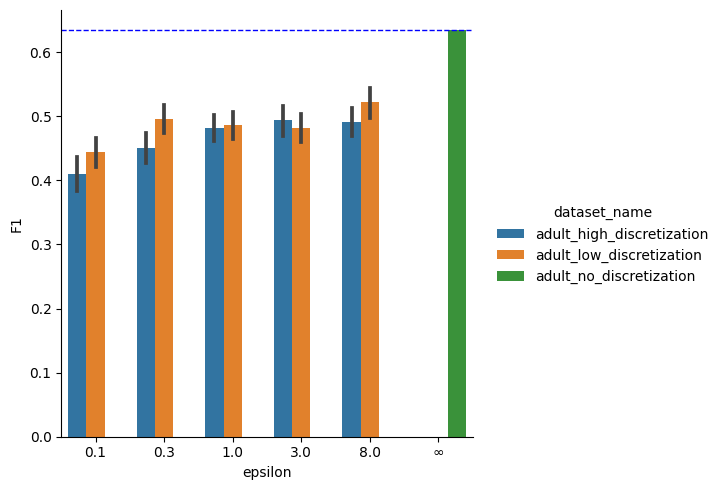

In [16]:
g = sns.catplot(data=discretization_lr_results_single, kind="bar", x="epsilon", hue="dataset_name", y="F1")
g.refline(y = f1_score, color = "blue", lw = 1)
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "discretization_logistic_regression_results_single_f1.pdf"))